In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from textblob import TextBlob

In [3]:
# Read the CSV file into a DataFrame
df1 = pd.read_csv('Science_edge.csv')

df2 = pd.read_csv('Politics_edge.csv')


In [ ]:
# Add an edge list identifier column
df1['edge_list'] = 'science'
df2['edge_list'] = 'politics'

In [ ]:
# Merge dataframes
merged_df = pd.concat([df1,df2])

In [7]:

# Filter edge list 1
df_edge_list1 = merged_df[merged_df['edge_list'] == 'science']

# Filter edge list 2
df_edge_list2 = merged_df[merged_df['edge_list'] == 'politics']

# Group by 'topics' for edge list 1
grouped_topics1 = df_edge_list1.groupby('topic_title')

# Group by 'topics' for edge list 2
grouped_topics2 = df_edge_list2.groupby('topic_title')

# Calculate the average sentiment scores for each topic in edge list 1
average_sentiment1 = grouped_topics1['sentiment_score'].mean()

# Calculate the average sentiment scores for each topic in edge list 2
average_sentiment2 = grouped_topics2['sentiment_score'].mean()

# Compare the average sentiment scores of each topic
comparison = pd.concat([average_sentiment1, average_sentiment2], axis=1)
comparison.columns = ['Average Sentiment Score (Edge List 1)', 'Average Sentiment Score (Edge List 2)']

# Print the comparison
print(comparison)

                                                    Average Sentiment Score (Edge List 1)  \
topics                                                                                      
['', '', '', '', '', '', '', '', '', '']                                         0.000000   
['2030', '2035', '2050', '2028', '2025', '2033'...                               0.019318   
['2050', '2025', '2c', 'apocalypse', '1c', 'mit...                               0.018988   
['2050', '2030s', 'catastrophic', 'decades', '2...                               0.104039   
['4chan', 'cia', 'fbi', 'buzzfeeds', 'buzzfeed'...                               0.000000   
...                                                                                   ...   
['railworkers', 'rail', 'railway', 'conrail', '...                                    NaN   
['reparations', 'internment', 'taxpayers', 'jap...                                    NaN   
['tankie', 'chomsky', 'tankies', 'chomskys', 't...                    

In [9]:
# Print all topics in the order of variance in sentiment
print(comparison.index)


Index(['2030', 'I', 'aerosol', 'africans', 'age', 'agree', 'agreement', 'ai',
       'alarmism', 'aliens',
       ...
       'lyft', 'meltdown', 'mormon', 'phrases', 'railworkers', 'reparations',
       'road', 'tankie', 'trump_presidency', 'utahans'],
      dtype='object', name='repeated_word', length=255)


In [10]:
import matplotlib.pyplot as plt

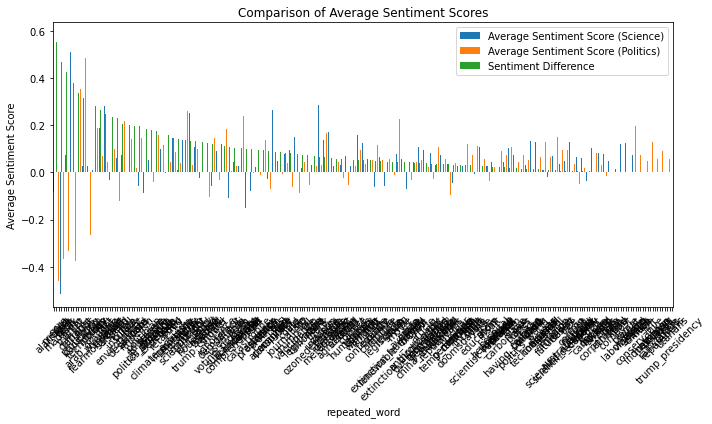

In [19]:
# Plot the comparison DataFrame as a bar plot with specified figure size
comparison.plot(kind='bar', figsize=(10, 6))

# Set the title of the plot
plt.title('Comparison of Average Sentiment Scores')

# Set the label for the x-axis
plt.xlabel('topic_title')

# Set the label for the y-axis
plt.ylabel('Average Sentiment Score')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to the plot
plt.legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Save the plot as an image file with high DPI (dots per inch)
plt.savefig('figure.png', dpi=300)

# Display the plot
plt.show()


/tmp/ipykernel_131/4062894156.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


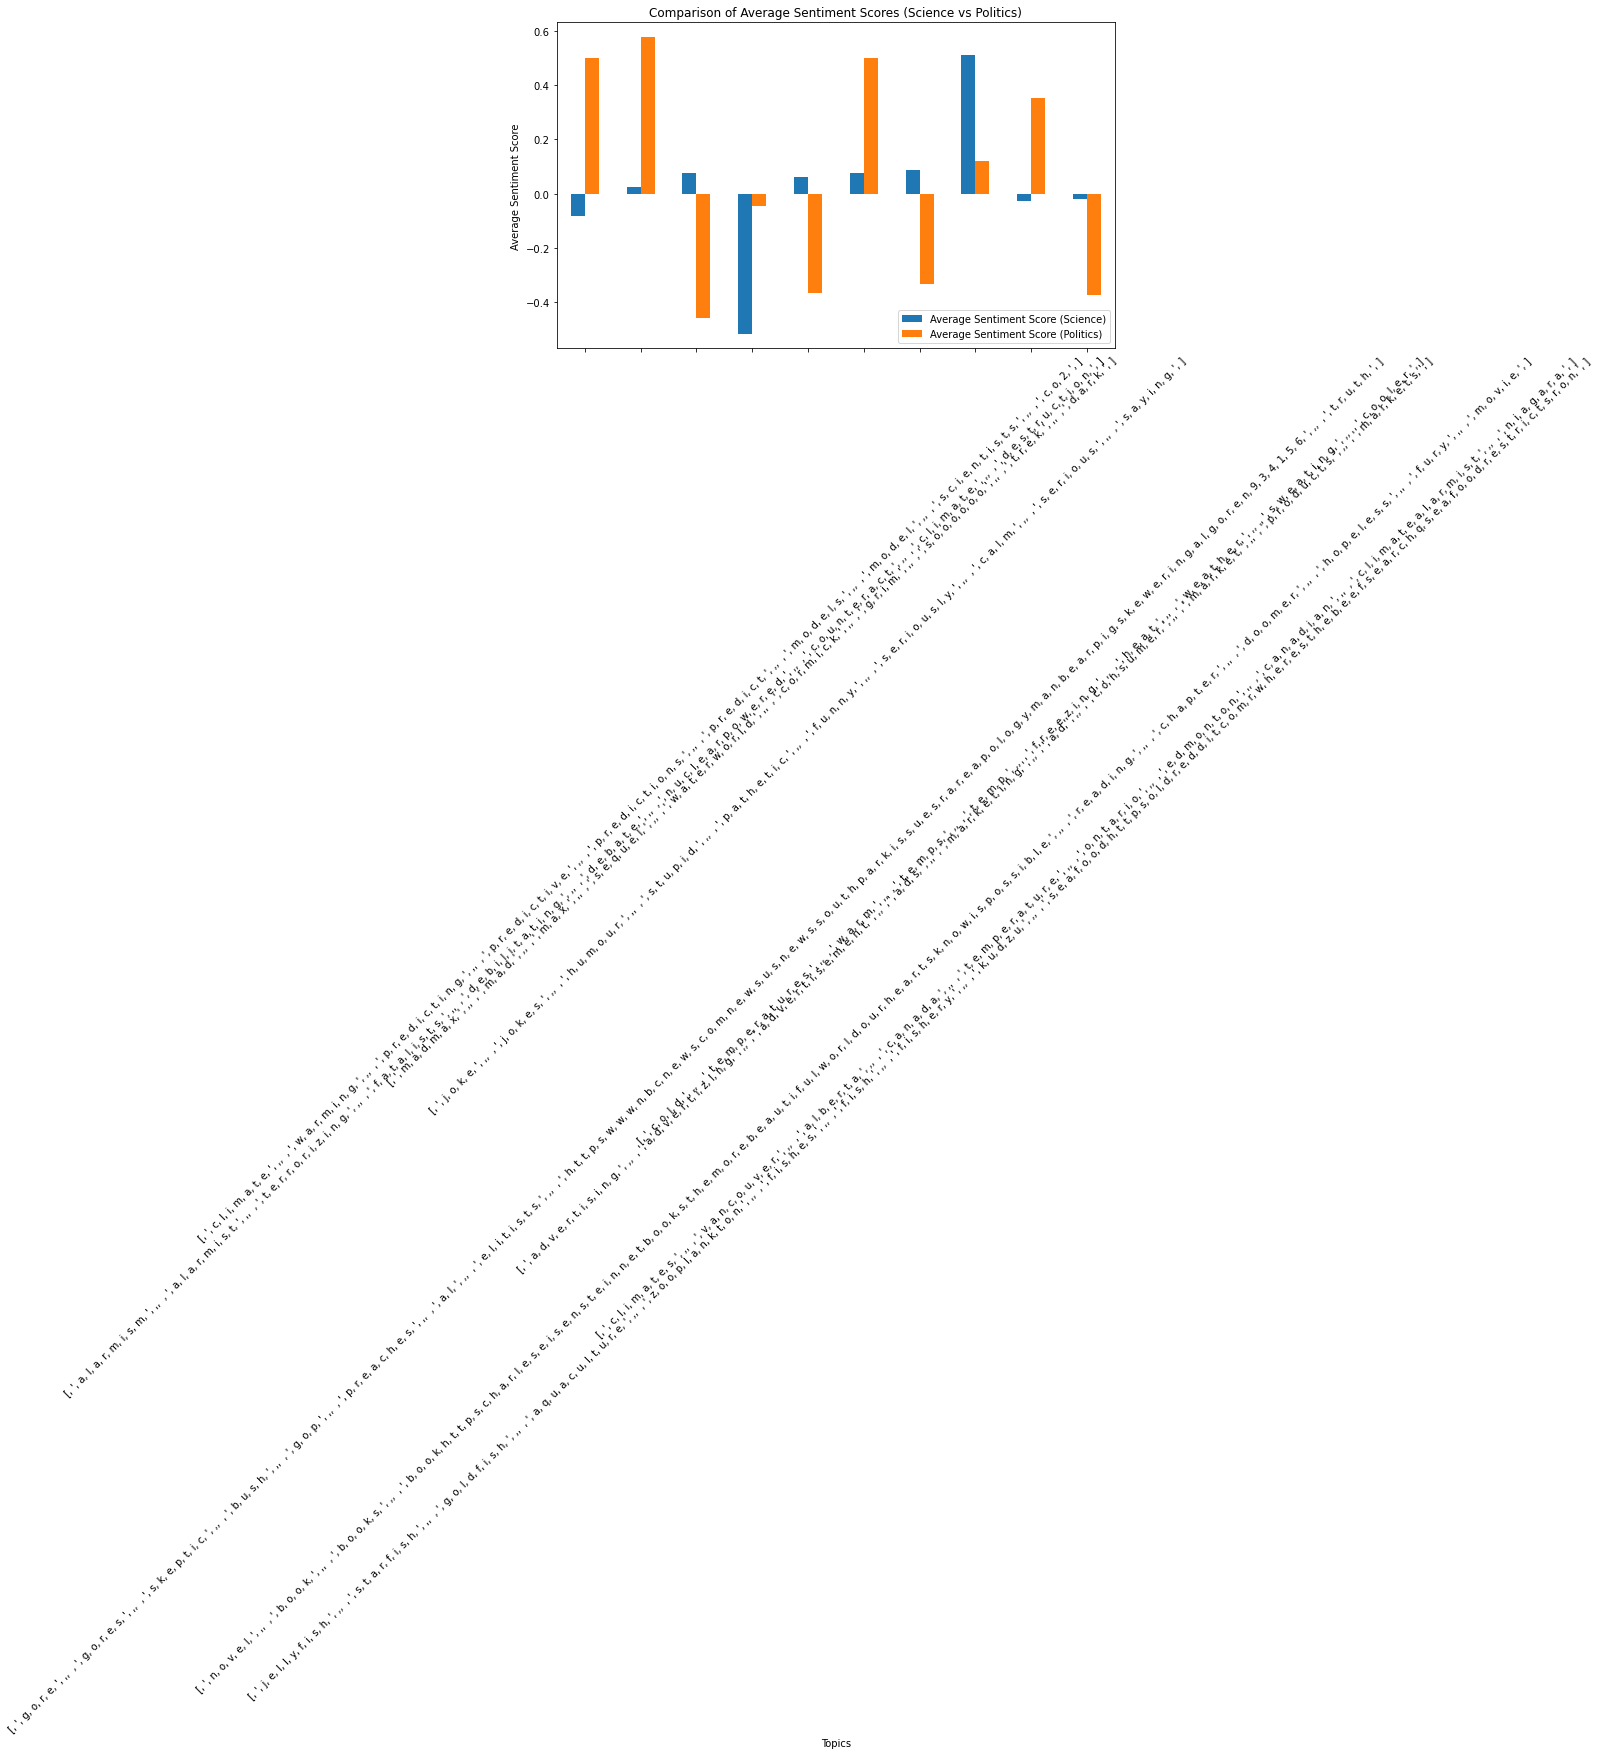

In [29]:
# Sort by sentiment difference in descending order
comparison = comparison.sort_values('Sentiment Difference', ascending=False)

# Select the top N topics with the largest sentiment difference
N = 20  # Change the number 10 to your desired value
top_topics = comparison.head(N)

# Plot the comparison for the top topics
top_topics.plot(kind='bar', y=['Average Sentiment Score (Science)', 'Average Sentiment Score (Politics)'], figsize=(10, 6))
plt.title('Comparison of Average Sentiment Scores')
plt.xlabel('Topics')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


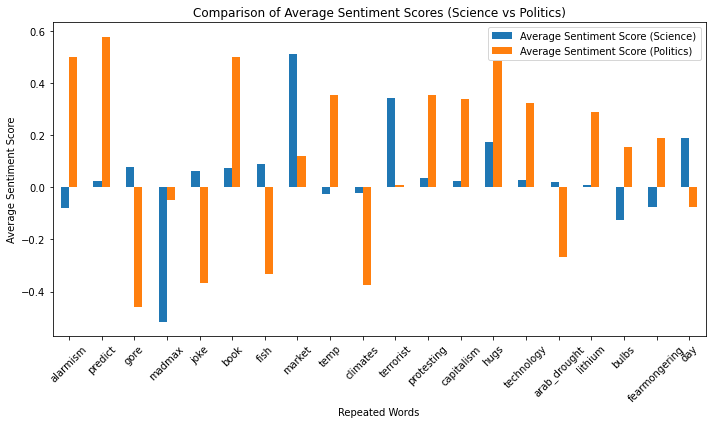

In [21]:
# Merge the two grouped DataFrames
comparison = pd.merge(grouped_topics1, grouped_topics2, on='repeated_word', how='outer')
comparison.columns = ['Average Sentiment Score (Science)', 'Average Sentiment Score (Politics)']

# Calculate the absolute difference in sentiment scores
comparison['Sentiment Difference'] = abs(comparison['Average Sentiment Score (Science)'] - comparison['Average Sentiment Score (Politics)'])

# Sort by sentiment difference in descending order
comparison = comparison.sort_values('Sentiment Difference', ascending=False)

# Select the top N repeated words with the largest

N = 20  
top_repeated_words = comparison.head(N)

# Plot the comparison
top_repeated_words.plot(kind='bar', y=['Average Sentiment Score (Science)', 'Average Sentiment Score (Politics)'], figsize=(10, 6))
plt.title('Comparison of Average Sentiment Scores (Science vs Politics)')
plt.xlabel('Repeated Words')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('figure.png',dpi=300)
plt.show()